In [1]:
import ROOT 

Welcome to JupyROOT 6.18/02


In [2]:
f = ROOT.TFile.Open("PICOSpec_run0.root")

rawTree = f.Get("PICO_tree_raw")

In [3]:
rawTree.Print()

******************************************************************************
*Tree    :PICO_tree_raw: TTree contain PICOSpec RAW event info                  *
*Entries :        2 : Total =            4771 bytes  File  Size =       1712 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :Mult      : Mult/I                                                 *
*Entries :        2 : Total  Size=        569 bytes  File Size  =         88 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :det_ID    : detector_ID[Mult]/I                                    *
*Entries :        2 : Total  Size=        694 bytes  File Size  =        110 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*................................................

In [4]:
nEntries = rawTree.GetEntries()


46.82737815903978
64.8414262484521


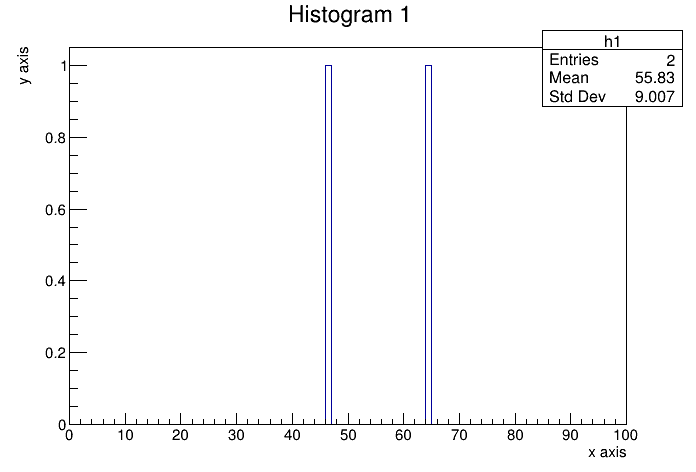

In [5]:
c = ROOT.TCanvas('c', 'canvas title')
h1 = ROOT.TH1F("h1", 'Histogram 1; x axis; y axis', 100, 0, 100)
for event in rawTree:
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 0 < event.det_ID[i] < 1024:
            print(event.Energy[i])
            h1.Fill(event.Energy[i])

h1.Draw()
c.Update()
c.Draw()

46.82737815903978
64.8414262484521


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).


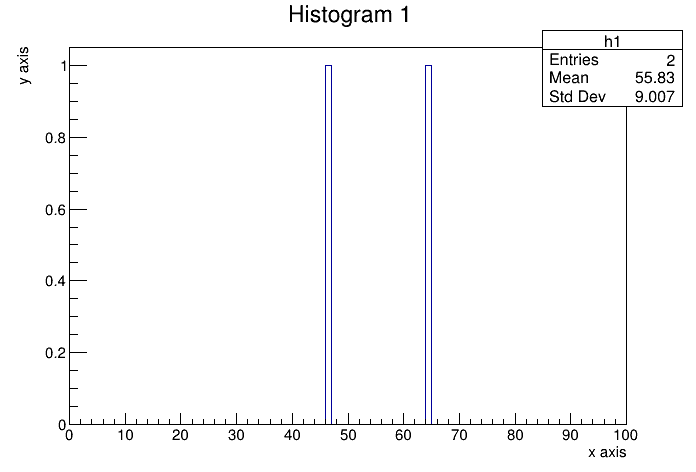

In [6]:
c = ROOT.TCanvas('c', 'canvas title')
h1 = ROOT.TH1F("h1", 'Histogram 1; x axis; y axis', 100, 0, 100)
for event in rawTree:
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 0 < event.det_ID[i] < 1024:
            print(event.Energy[i])
            h1.Fill(event.Energy[i])

h1.Draw()
c.Update()
c.Draw()
        

46.82737815903978
64.8414262484521


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


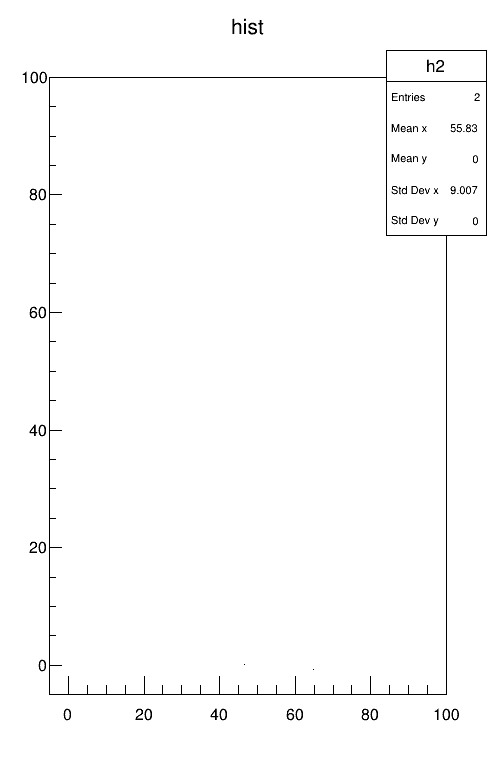

In [9]:
c1 = ROOT.TCanvas("c1","2D histogram ", 500, 0, 500, 800);
h2 = ROOT.TH2F("h2","hist", 100, -5, 100., 100, -5, 100.); #filling 2D histogram 
for event in rawTree:
    #print(event.Energy, event.Mult) 
    E_imp = 0
    E_box = 0
    for i in range(event.Mult):
        if 0 < event.det_ID[i] < 2048:
            if 0 < event.det_ID[i] < 1024:  # event in implantation detector 
                print(event.Energy[i])
                E_imp = event.Energy[i]
            if 1024 < event.det_ID[i] < 2048: # event in box detector
                print(event.Energy[i])
                E_box = event.Energy[i]
            h2.Fill(E_imp, E_box)
h2.Draw()
c1.Update()
c1.Draw()